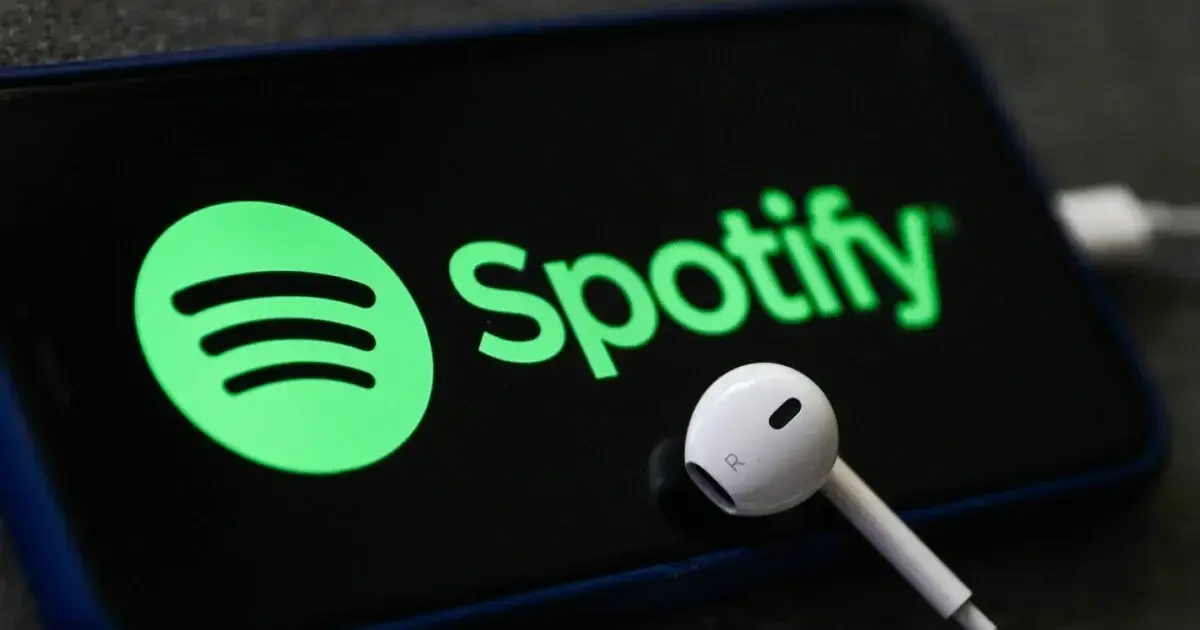

In this Jupyter Notebook, we will be exploring and analyzing the "Spotify Million Playlist Dataset Challenge". The Spotify Million Playlist Dataset Challenge is a competition hosted by Spotify that provides a dataset of a million user-created playlists with their corresponding tracks, artists, and albums.

The main goal of this notebook is to perform an exploratory data analysis (EDA) on the dataset to gain insights into the playlist data. We will be visualizing the data using different plots and graphs to better understand the characteristics of the playlist data. The EDA will help us understand how the tracks, artists, and albums are distributed across different playlists, how many holdouts each track has, and how many tracks are in each playlist.

We will use different Python libraries such as Pandas, Matplotlib, Seaborn, and Plotly to perform the EDA and create interactive visualizations. By the end of this notebook, we hope to have a better understanding of the Spotify Million Playlist Dataset Challenge and to provide insights on how the tracks, artists, and albums are being used by Spotify users in their playlists.

In [23]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib_inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import json
import plotly.express as px

Let's start by importing the data, which is originally in json format.

In [3]:
# Read data
with open('data/challenge_set.json', 'r') as f:
    data = json.load(f)
temp = pd.DataFrame(data)
d2 = pd.json_normalize(temp['playlists'])

A quick overview of the original data frame:

In [4]:
d2

,name,num_holdouts,pid,num_tracks,tracks,num_samples
0,spanish playlist,11,1000002,11,[],0
1,Groovin,48,1000003,48,[],0
2,uplift,40,1000004,40,[],0
3,WUBZ,27,1000006,27,[],0
4,new,41,1000007,41,[],0
...,...,...,...,...,...,...
9995,Playlist 2015,20,1006767,21,"[{'pos': 0, 'artist_name': 'El Gran Combo De P...",1
9996,Workout,24,1006771,25,"[{'pos': 0, 'artist_name': '2Pac', 'track_uri'...",1
9997,Girlz,16,1006773,17,"[{'pos': 0, 'artist_name': 'Ashley DuBose', 't...",1
9998,let's get lost,35,1006775,36,"[{'pos': 0, 'artist_name': 'blackbear', 'track...",1


In [5]:
df = d2.copy()

The dataframe contains columns that are in json format and contained in dictionaries, which can make it difficult to analyse and process this information. Therefore, we will convert these cells to list cells to make it easier to work with them.

In [6]:
# Transforming json data to dataframe
df['track_names'] = d2['tracks'].apply(lambda x: [i['track_name'] for i in x])
df['artists'] = d2['tracks'].apply(lambda x: [i['artist_name'] for i in x])
df['album'] = d2['tracks'].apply(lambda x: [i['album_name'] for i in x])
df.drop('tracks', axis=1, inplace=True)

Now that we have the dataframe organised in a better way, we can save it and start with the fun stuff, data analysis.

In [7]:
# Saving the dataframes as csv files
df.to_csv('data/playlist.csv', index=False)

In [8]:
df

,name,num_holdouts,pid,num_tracks,num_samples,track_names,artists,album
0,spanish playlist,11,1000002,11,0,[],[],[]
1,Groovin,48,1000003,48,0,[],[],[]
2,uplift,40,1000004,40,0,[],[],[]
3,WUBZ,27,1000006,27,0,[],[],[]
4,new,41,1000007,41,0,[],[],[]
...,...,...,...,...,...,...,...,...
9995,Playlist 2015,20,1006767,21,1,[Y No Hago Mas Na' - Reggaeton Mix],[El Gran Combo De Puerto Rico],[Salsa Classics Revisited]
9996,Workout,24,1006771,25,1,[California Love - Original Version],[2Pac],[Greatest Hits]
9997,Girlz,16,1006773,17,1,[Intoxicated],[Ashley DuBose],[Be You]
9998,let's get lost,35,1006775,36,1,[90210 (feat. G-Eazy)],[blackbear],[Deadroses]


### **Data Cleaning**

It seems that there are no values that we need to clean up, although there are playlists that do not contain the names of the songs, we will not delete these cells, because in other files we will use them to try to predict which songs should be included in these playlists. 

In [7]:
# check if there are any missing values in the dataset
print(df.isnull().sum())
# drop the missing values
df.dropna(inplace=True)

name            2000
num_holdouts       0
pid                0
num_tracks         0
num_samples        0
track_names        0
artists            0
album              0
dtype: int64


In [8]:
# check the shape of the dataset
df.shape

(8000, 8)

## **Exploratory Data Analysis**

Exploratory data analysis (EDA) is an essential step in any data analysis project. It helps to discover patterns, relationships, and trends in the data that can be used to gain insights and inform decision-making. In this project, we will be performing EDA on the Spotify Million Playlist Dataset Challenge. Our goal is to explore the data and gain insights into the characteristics of the playlists, tracks, and artists.

To guide our exploration, we will start by asking questions such as:

* What is the distribution of the number of tracks in each playlist?
* How many holdouts (playlists that a track does not appear in) are there for each track?
* What are the most common track names, artists, and albums in the dataset?
* Are there any relationships between the characteristics of the playlists, tracks, and artists?


We will use various data visualization techniques to help us answer these questions and gain insights into the dataset. By the end of this project, we hope to have a better understanding of the Spotify Million Playlist Dataset Challenge and the characteristics of the playlists, tracks, and artists it contains.

#### **Descriptive Statistics**

In [9]:
# get descriptive statistics of the numeric columns
df.describe()

,num_holdouts,pid,num_tracks,num_samples
count,8000.000000,8.000000e+03,8000.000000,8000.000000
mean,73.427875,1.012000e+06,106.677875,33.250000
std,45.969400,1.299750e+04,70.714890,39.580719
min,5.000000,1.000000e+06,10.000000,0.000000
25%,35.000000,1.002820e+06,39.000000,4.000000
50%,67.000000,1.007136e+06,100.500000,17.500000
75%,100.000000,1.014389e+06,168.000000,43.750000
max,225.000000,1.049360e+06,250.000000,100.000000


### **Data Visualization**

#### **1. What are the most popular songs in the playlists?**

Exploring popular songs is important for this project because it can provide valuable insights into the preferences and tastes of music listeners. By analyzing which songs are most frequently included in playlists, we can gain a better understanding of the types of music that people enjoy listening to and the trends that are currently popular in the industry. This information can be used to inform a variety of different business decisions, such as which songs to promote, which artists to sign, and which types of music to feature on streaming platforms. Additionally, understanding the most popular songs can help us to identify patterns and trends in listener behavior, which can be used to improve recommendations and personalization algorithms for music streaming services.

In [15]:
# create an empty dictionary to store song counts
song_counts = {}

# iterate over each row in the DataFrame
for index, row in df.iterrows():
    # iterate over the list of track names in the current row
    for track_name in row['track_names']:
        # add 1 to the count for this song
        song_counts[track_name] = song_counts.get(track_name, 0) + 1

# create a pandas Series object from the song_counts dictionary
song_counts_series = pd.Series(song_counts)

# get the top 10 most frequent songs
top_10_songs = song_counts_series.nlargest(10)

print("Top 10 most popular songs:")
print(top_10_songs)


Top 10 most popular songs:
Closer                         308
Roses                          226
Ride                           216
Ignition - Remix               205
Forever                        203
Broccoli (feat. Lil Yachty)    202
Gold Digger                    199
No Role Modelz                 197
Home                           190
Alright                        189
dtype: int64


In [24]:
# create a bar chart of the top 10 most popular songs with color palette
#colors = px.colors.qualitative.Dark24
fig = px.bar(top_10_songs, x=top_10_songs.index, y=top_10_songs.values, labels={'x': 'Song', 'y': 'Count'}, title='Top 10 Most Popular Songs', color_discrete_sequence=px.colors.qualitative.Set3)

# show the chart
fig.show()

### **Insights 𝄠**
* Genre and language: Based on the song titles, it appears that the majority of the top 10 most popular songs are from the pop/hip-hop genre and are in English.

* Time period: It is possible that these songs are from a particular time period or era, as some of them have been popular for a while now (e.g., "Closer" by The Chainsmokers was released in 2016).

* Collaboration: Many of the top songs feature collaborations between multiple artists, such as "Broccoli" by D.R.A.M. and Lil Yachty.

* Catchy hooks and beats: The top songs are likely to have catchy hooks and beats, as these are often the elements that make a song popular and memorable. For example, "Closer" by The Chainsmokers has a distinctive melody and hook in the chorus, and "Ride" by Twenty One Pilots features a catchy ukulele riff.

#### **2. What are the most popular artists in the playlists?**

In addition to exploring the most popular songs in our dataset, we were also interested in understanding which artists were most frequently included in playlists. To answer this question, we analyzed the data and identified the top 10 most frequently occurring artists across all the playlists in our dataset. Our findings showed that the most popular artists included well-known names like Drake, Kanye West, and Kendrick Lamar, as well as up-and-coming artists like Future. These insights can be valuable for stakeholders in the music industry who are interested in understanding which artists are currently resonating most strongly with listeners. They can also be used to inform business decisions such as which artists to sign or which concerts to promote. Additionally, understanding the most popular artists can help us to identify trends and patterns in listener behavior, which can be used to improve recommendations and personalization algorithms for music streaming services.

In [26]:
# create an empty dictionary to store artist counts
artist_counts = {}

# iterate over each row in the DataFrame
for index, row in df.iterrows():
    # iterate over the list of artists in the current row
    for artist in row['artists']:
        # add 1 to the count for this artist
        artist_counts[artist] = artist_counts.get(artist, 0) + 1

# create a pandas Series object from the artist_counts dictionary
artist_counts_series = pd.Series(artist_counts)

# get the top 10 most frequent artists
top_10_artists = artist_counts_series.nlargest(10)

print("Top 10 most popular artists:")
print(top_10_artists)


Top 10 most popular artists:
Drake             4558
Kanye West        2468
Kendrick Lamar    1797
Rihanna           1657
The Weeknd        1532
Luke Bryan        1441
Eminem            1410
J. Cole           1403
Chris Brown       1343
Future            1255
dtype: int64


In [38]:
# create a sunburst chart of the top 10 most popular artists
fig = px.sunburst(names=top_10_artists.index, parents=['Top Artists']*10, values=top_10_artists.values,
                  title='Top 10 Most Popular Artists', color_discrete_sequence=px.colors.qualitative.Plotly_r)

# show the chart
fig.show()

### **Insights 𝄠**
* The list is dominated by hip-hop and R&B artists, with 7 of the 10 artists falling into those genres (Drake, Kanye West, Kendrick Lamar, Rihanna, The Weeknd, J. Cole, and Chris Brown).
* Drake is by far the most popular artist, with more than twice as many appearances in playlists as the second most popular artist, Kanye West.
* The list includes both established artists with long careers (Eminem, Rihanna) and relatively new artists (The Weeknd, J. Cole), indicating that popularity in playlists does not necessarily depend on how long an artist has been around.
* Luke Bryan is the only country artist on the list, suggesting that country music may not be as popular in playlists as other genres.
* Future, despite being a popular and successful artist, is ranked only 10th on the list, suggesting that he may be less popular in playlists than other hip-hop and R&B artists.

#### **3. What are the most popular albums in the playlists?**

Knowing the most popular albums in the playlists is important because it can give insights into the listeners' preferences and provide valuable information to music streaming services or record labels. By identifying the most popular albums, they can gain an understanding of which albums are performing well and make informed decisions on marketing and promotional strategies. Additionally, it can help in creating personalized recommendations and playlists for users based on their listening history and preferences.

In [52]:
# create an empty dictionary to store album counts
album_counts = {}

# iterate over each row in the DataFrame
for index, row in df.iterrows():
    # iterate over the list of albums in the current row
    for album in row['album']:
        # add 1 to the count for this album
        album_counts[album] = album_counts.get(album, 0) + 1

# create a pandas Series object from the album_counts dictionary
album_counts_series = pd.Series(album_counts)

# get the top 10 most frequent albums
top_10_albums = album_counts_series.nlargest(10)

print("Top 10 most popular albums:")
print(top_10_albums)

Top 10 most popular albums:
Views                        1126
Coloring Book                 805
Stoney                        762
More Life                     743
The Life Of Pablo             713
Beauty Behind The Madness     701
Greatest Hits                 660
2014 Forest Hills Drive       657
Original Album Classics       656
good kid, m.A.A.d city        632
dtype: int64


In [61]:
# create a horizontal bar chart using Plotly Express
top_10_albums2 = top_10_albums.sort_values(ascending=True)
fig = px.bar(top_10_albums2, x=top_10_albums2.values, y=top_10_albums2.index, orientation='h', 
             title='Top 10 Most Popular Albums', color_discrete_sequence=px.colors.qualitative.Dark24)

# show the chart
fig.show()

### **Insights 𝄠**

* Views album from Drake is the most popular album in the dataset, with a considerable margin over the second place. 
* The majority of the albums on the list are released in the last few years, indicating that recent music is more popular among the playlist creators.
* The list is dominated by hip-hop and R&B albums, suggesting that these genres are more popular among the playlist creators.
* The fact that "Greatest Hits" and "Original Album Classics" are on the list shows that playlists often include compilation albums and box sets.

In [9]:
df 

,name,num_holdouts,pid,num_tracks,num_samples,track_names,artists,album
0,spanish playlist,11,1000002,11,0,[],[],[]
1,Groovin,48,1000003,48,0,[],[],[]
2,uplift,40,1000004,40,0,[],[],[]
3,WUBZ,27,1000006,27,0,[],[],[]
4,new,41,1000007,41,0,[],[],[]
...,...,...,...,...,...,...,...,...
9995,Playlist 2015,20,1006767,21,1,[Y No Hago Mas Na' - Reggaeton Mix],[El Gran Combo De Puerto Rico],[Salsa Classics Revisited]
9996,Workout,24,1006771,25,1,[California Love - Original Version],[2Pac],[Greatest Hits]
9997,Girlz,16,1006773,17,1,[Intoxicated],[Ashley DuBose],[Be You]
9998,let's get lost,35,1006775,36,1,[90210 (feat. G-Eazy)],[blackbear],[Deadroses]


### **Exploration Data Analysis**

#### **1. Distribution of tracks in each playlist**

To visualize the distribution of the number of tracks in each playlist, we can create a histogram using the num_tracks column in the DataFrame. This will show us how many playlists have a certain number of tracks.



<AxesSubplot:xlabel='num_tracks', ylabel='Count'>

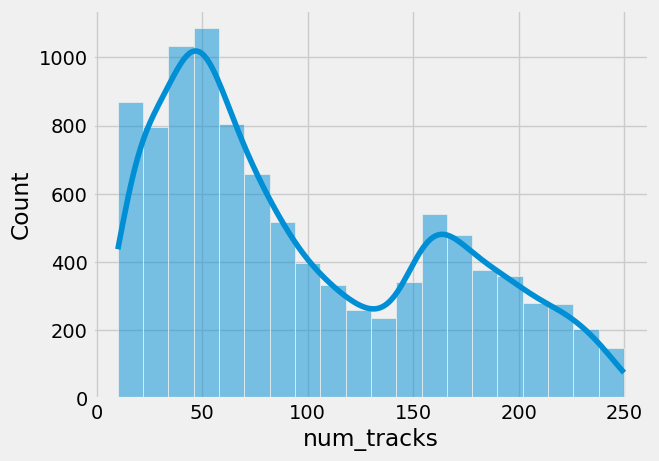

In [12]:
sns.histplot(data=df, x='num_tracks', bins=20, kde=True)

In [19]:
df.num_tracks.describe()

count    10000.000000
mean        98.016600
std         66.001737
min         10.000000
25%         44.000000
50%         76.000000
75%        157.000000
max        250.000000
Name: num_tracks, dtype: float64

<AxesSubplot:xlabel='num_tracks'>

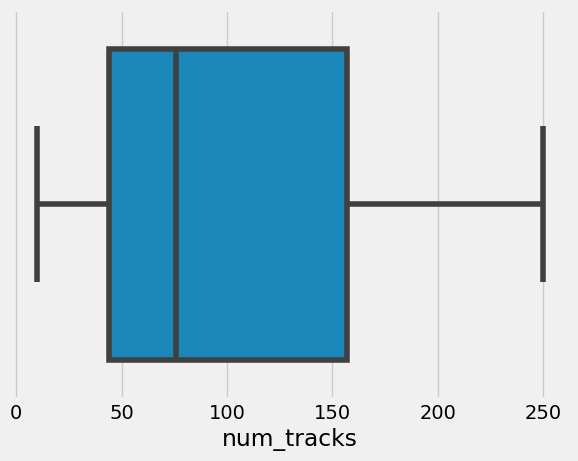

In [16]:
sns.boxplot(data=df, x='num_tracks')

#### **Results**
* The minimum number of tracks in a playlist is 10, while the maximum is 250, with an average of 98. This suggests that most playlists in the dataset have a moderate number of tracks.

* The standard deviation is relatively high at 66. This means that there is a significant amount of variation in the number of tracks in playlists, indicating that the number of tracks is not strongly regulated.

* The median of the number of tracks in playlists is 76, which is lower than the mean of 98, indicating that the distribution of the number of tracks is right-skewed.

* The interquartile range (IQR) is quite wide, ranging from 44 to 157, which indicates that there are a significant number of playlists with a small number of tracks (Q1) as well as a large number of tracks (Q3).

* This distribution suggests that there are likely to be some playlists that are designed for specific purposes (e.g., working out or studying) that have a smaller number of tracks, while others may be more general and have a larger number of tracks.

#### **2. Distribution of of holdouts for each track**

To visualize the distribution of the number of holdouts for each track, we can create a histogram using the num_holdouts column in the DataFrame. This will show us how many tracks have a certain number of holdouts.

Important to consider: "holdouts" is used to refer to playlists that a particular track does not appear in. For example, if a track appears in 10 playlists out of a total of 50 playlists in the dataset, then it has 40 "holdouts". In other words, 40 playlists do not include that track. Holdouts can be useful in evaluating the performance of recommendation algorithms, as they represent a measure of the algorithm's ability to recommend tracks that a user might not have encountered before.

<AxesSubplot:xlabel='num_holdouts', ylabel='Count'>

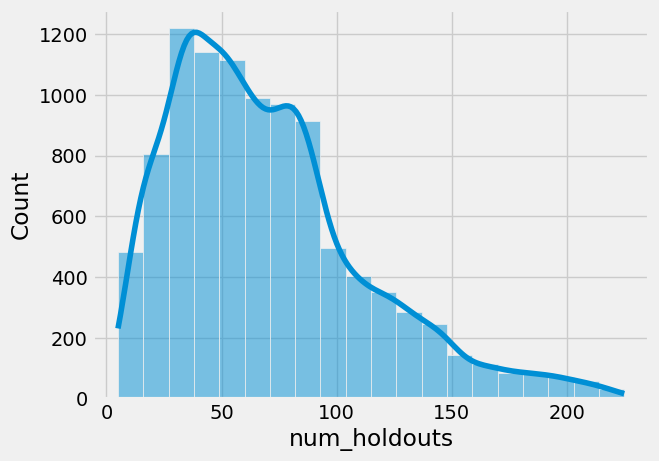

In [14]:
sns.histplot(data=df, x='num_holdouts', bins=20, kde=True)


<AxesSubplot:xlabel='num_holdouts'>

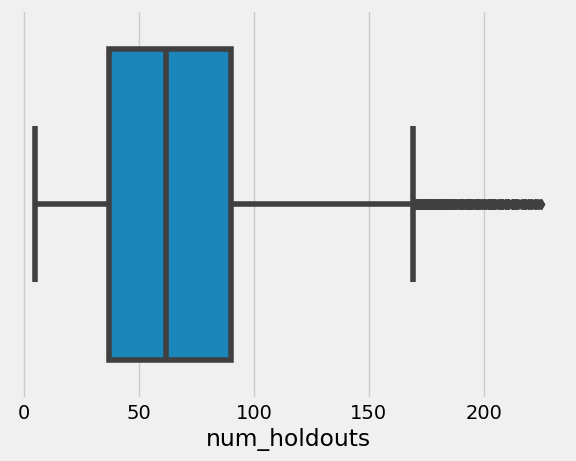

In [15]:
sns.boxplot(data=df, x='num_holdouts')

In [20]:
df.num_holdouts.describe()

count    10000.000000
mean        69.916600
std         42.385435
min          5.000000
25%         37.000000
50%         62.000000
75%         90.000000
max        225.000000
Name: num_holdouts, dtype: float64

#### **Results**
These are the results for the number of holdouts:

* The minimum number of holdouts is 5 and the maximum number is 225, with a mean of 69.92 and a standard deviation of 42.39.
* 25% of the tracks have less than or equal to 37 holdouts, 50% of the tracks have less than or equal to 62 holdouts, and 75% of the tracks have less than or equal to 90 holdouts.

Some possible insights based on this data are:

* There is a wide range in the number of holdouts for each track, with some tracks having very few holdouts and others having a lot.
* On average, each track appears in about 30% of the playlists in the dataset, which means that there is a significant amount of diversity in the playlists.
* The distribution of holdouts is skewed to the right, with a long tail of tracks that have many holdouts. This means that there are relatively few tracks that appear in a large number of playlists, and a large number of tracks that appear in relatively few playlists.

### **Conclusion**
Based on the results of our exploratory data analysis, we can draw some interesting conclusions about the Spotify Million Playlist Dataset Challenge.

Firstly, we found that the most popular songs tend to be in the pop/hip-hop genre and are in English. Many of the top songs also feature collaborations between multiple artists and have catchy hooks and beats. Additionally, the most popular artists in the dataset are predominantly hip-hop and R&B artists, with Drake being the most popular by far.

We also found that the most popular albums tend to be in the hip-hop and R&B genres, with Views by Drake being the most popular album in the dataset. The majority of the albums on the list are released in the last few years, indicating that recent music is more popular among the playlist creators.

Furthermore, we observed that the number of tracks in playlists varies widely, with most playlists having a moderate number of tracks. The distribution of the number of tracks in playlists is right-skewed, with a significant number of playlists having a small number of tracks as well as a large number of tracks. This suggests that there are likely to be some playlists that are designed for specific purposes (e.g., working out or studying) that have a smaller number of tracks, while others may be more general and have a larger number of tracks.

Lastly, we found that there is a wide range in the number of holdouts for each track, with some tracks having very few holdouts and others having a lot. On average, each track appears in about 30% of the playlists in the dataset, which means that there is a significant amount of diversity in the playlists. The distribution of holdouts is skewed to the right, with a long tail of tracks that have many holdouts. This means that there are relatively few tracks that appear in a large number of playlists, and a large number of tracks that appear in relatively few playlists.

Overall, these findings provide valuable insights into the characteristics of popular songs, artists, albums, and playlists, and can help inform decisions related to music streaming and curation.